# 2. 의사결정트리(Decision Tree)

물건을 팔아야 하는 상황, 

불특정 다수에게 광고하여 판매 vs 상황에 따른 효율적 판매를 예측하여 계획

==> 상황에 따른 효율적 판매를 예측하여 계획

화장품 가게 주인인 새미씨, 단골손님들에게 쿠폰을 나누어 주고 싶다.

==> 고객에 특성에 맞게 쿠폰 선호 여부를 알려주는 Map을 만드는 것이 좋다. ==> 의사결정트리

의사결정트리 관련 개념: 엔트로피, 지니계수, 카이제곱스퀘어

### **[의사결정트리를 만드는 과정]**

데이터를 나누는 기준을 찾는 것이 중요하다. ==> 엔트로피를 줄인다.

1. 엔트로피가 가장 많이 줄어드는 방법으로 데이터를 나눈다.
2. 다른 속성 기준으로 다시 데이터를 나눈다.
3. 엔트로피가 0이 될 때까지 계속 반복한다.(어느 정도 수준으로 줄어들 때까지...)
4. leaf에 도달한다.

정보 이득이 최대가 되도록 가지치기를 하여 데이터를 나눠야 한다. ==> **의사결정트리의 핵심!**

의사결정트리의 가장 기본적인 역할은 **범주형 데이터를 분류**하는 것이다. 또는 회귀분석을 결합해서 연속형 데이터를 예측할 수 있다.

### 엔트로피란?

한 상자에 파란 구슬 2개와 빨간 구슬 3개가 있다. 이 상태는 엔트로피가 높은 상태이다.

이것을 색깔별로 나누어 각각 분리한다. 그러면 엔트로피가 큰 폭으로 줄어들게 되고 

파란 구슬만 있는 상자의 엔트로피는 0, 빨간 구슬이 들어 있는 상자의 엔트로피는 0이 된다.

### 다양한 의사결정트리 알고리즘
- CART
- C4.5
- C5.0

### 의사결정트리 알고리즘의 공통점
- 엔트로피 이용
- 지니계수 이용
- 데이터를 나누는 방법에 이용
- 가장 영향력이 큰 속성을 이용함

### 데이터 불순도 평가 기준
- 지니계수: 엔트로피 대신에 속도가 빠름
- 엔트로피: 데이터의 불순도가 희석되는 방향으로 데이터를 나누는 방법
- 카이제곱스퀘어(데이터의 독립성 검정을 위해 사용): 상관관계가 가장 적도록 나누는 방법

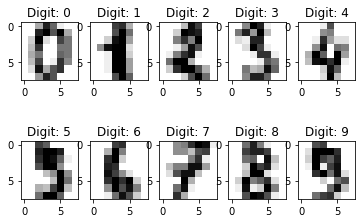

In [3]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree # tree: 엔트로피를 이용해서 의사결정트리를 만드는 방법이 녹아 있음
from sklearn.metrics import accuracy_score, confusion_matrix # 정확도, 혼돈 행렬
from sklearn.metrics import precision_score, recall_score, f1_score

# 데이터 불러오기
digits = datasets.load_digits()

# 이미지 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
label, img, img.shape

# '9'라는 데이터가 의미하는 그림을 수치로 나타낸 값

(9,
 array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]),
 (8, 8))

In [14]:
# 목표: img 데이터를 이용해서 label(숫자값)를 분류하는 것 >> 분류 알고리즘 이용

images = digits.images
labels = digits.target

# 차원 축소(-1): 64 size의 벡터로 만들어 입력값으로 사용함
images = images.reshape(images.shape[0], -1)

# 결정트리 생성
n_samples = len(images) # 전체 데이터 개수
train_size = int(n_samples * 2 / 3) # 전체 중 2/3 데이터를 train 데이터로 사용
classifier = tree.DecisionTreeClassifier(max_depth = 3) # depth: Root Node에서 Leaf Node까지의 거리
classifier.fit(images[:train_size], labels[:train_size]) # 학습

# 결정트리의 성능 확인
expected = labels[train_size:] # 실제값 저장
predicted = classifier.predict(images[train_size:]) # 테스트 데이터를 이용해서 예측

print('Accuracy:\n', # 정확도(실제값과 예측값 비교, 정확성 낮음)
     accuracy_score(expected, predicted))
print('Confusion matrix:\n', # 혼돈 행렬(대각선에 값이 모여있을수록 좋은 모델)
     confusion_matrix(expected, predicted))

Accuracy:
 0.44908180300500833
Confusion matrix:
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


In [16]:
# 실제값
expected

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [17]:
# 모델이 예측한 값
predicted

array([2, 2, 7, 7, 7, 2, 2, 0, 0, 2, 2, 7, 7, 2, 0, 7, 2, 2, 9, 3, 4, 3,
       3, 0, 2, 2, 2, 4, 3, 2, 7, 0, 3, 3, 2, 7, 2, 0, 0, 7, 7, 2, 3, 2,
       7, 4, 2, 2, 3, 7, 3, 9, 2, 7, 2, 7, 2, 3, 4, 4, 0, 7, 3, 2, 3, 2,
       4, 4, 5, 2, 4, 7, 2, 2, 2, 2, 5, 7, 3, 4, 2, 7, 2, 4, 9, 0, 7, 3,
       2, 0, 3, 2, 3, 2, 3, 2, 7, 2, 3, 0, 2, 3, 3, 0, 3, 2, 7, 2, 9, 0,
       3, 2, 3, 0, 3, 2, 7, 7, 9, 0, 9, 3, 3, 2, 4, 2, 3, 7, 3, 2, 2, 2,
       7, 7, 3, 3, 2, 0, 0, 2, 3, 7, 2, 3, 0, 3, 3, 2, 3, 3, 4, 2, 3, 0,
       2, 2, 2, 4, 9, 2, 3, 0, 9, 2, 2, 2, 3, 0, 0, 2, 7, 2, 3, 2, 2, 7,
       2, 2, 3, 7, 3, 2, 2, 7, 2, 7, 2, 3, 7, 4, 0, 4, 3, 5, 9, 2, 7, 7,
       4, 2, 2, 7, 3, 2, 2, 2, 3, 7, 3, 4, 2, 7, 4, 2, 0, 0, 7, 0, 3, 2,
       3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4,
       3, 2, 7, 2, 9, 0, 9, 3, 3, 2, 3, 0, 9, 2, 9, 2, 2, 3, 7, 4, 3, 3,
       3, 0, 0, 2, 2, 7, 3, 2, 0, 3, 2, 3, 3, 3, 7, 3, 3, 4, 2, 2, 2, 4,
       9, 3, 3, 0, 9, 3, 2, 2, 2, 0, 0, 3, 7, 3, 3,

---

## 실습 문제

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [23]:
iris = load_iris()

In [41]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
# 예측할 값
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
clf = DecisionTreeClassifier(random_state = 0) # random_state: 랜덤으로 추출되는 값을 고정하는 역할
clf # 의사결정트리 객체 생성

DecisionTreeClassifier(random_state=0)

In [30]:
cross_val_score(clf, iris.data, iris.target, cv=10) # 10번 훈련

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [32]:
clf.fit(iris.data, iris.target) # 학습 수행

DecisionTreeClassifier(random_state=0)

In [34]:
clf.predict(iris.data) # 예측

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
iris.target == clf.predict(iris.data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [37]:
import numpy as np
np.mean(iris.target == clf.predict(iris.data))

1.0

---
---
# [온아이리포 강의]

# 분류모델

붓꽃의 품종을 분류하는 문제를 머신러닝 알고리즘으로 어떻게 해결하는지 살펴봅니다.

[분석 데이터] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

[Cross validation과 GridSearch하는 방법] https://techblog-history-younghunjo1.tistory.com/100

## 1. 기본 분류모델(DecisionTree)

### 라이브러리 로딩

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

### 데이터 로딩

In [7]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


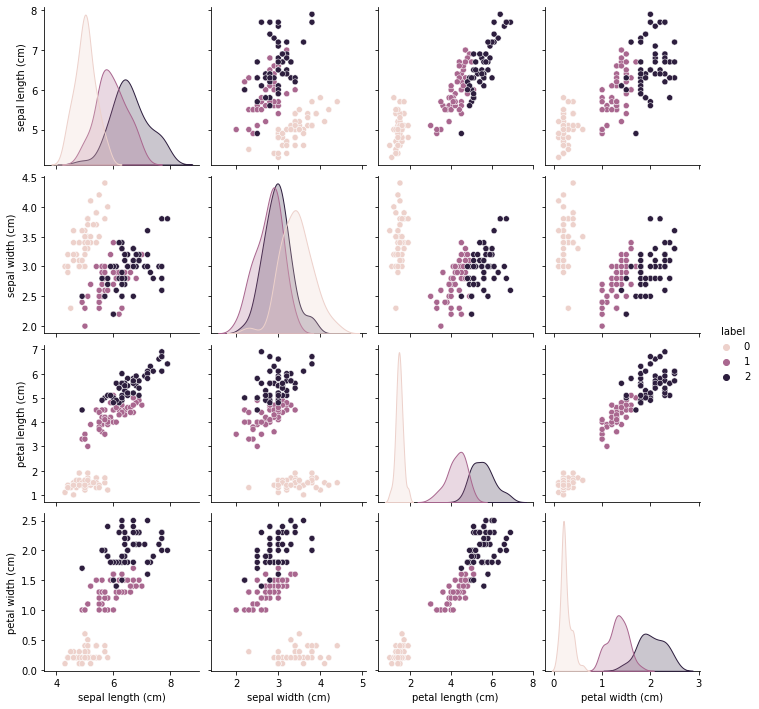

In [10]:
sns.pairplot(data = iris_df, hue = 'label')

### 데이터분할

In [11]:
X = iris_df.iloc[:, :4]
y = iris_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# random_state: 여러 번 모델을 만들 때 동일하게 분할된 데이터로 학습을 진행하기 위해 설정하는 파라미터

#### stratify 의미

stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정한다. 예를 들어 0,1의 클래스가 input dataset에 20:80 비율로 있었다면 훈련 데이터와 테스트 데이터 역시 각각의 클래스가 같은 비율로 있도록 지정할 수 있다.  
(데이터가 치우쳐 있을 때 골고루 학습하게 만든다.)

### 학습

In [12]:
# DecisionTreeClassifier 객체 생성 
tree_model = DecisionTreeClassifier(random_state=42)

# 학습 수행 
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 평가

In [13]:
#테스트용 데이터로 모델 평가
score = tree_model.score(X_test, y_test)
score

0.8947368421052632

### 예측

In [14]:
import numpy as np
data = np.array([
    [5.4, 4, 1.5, 0.2],
    [6.2 , 2.7, 5.1, 1.6],
    [6.5, 3.1 , 5.2, 2.]
])

y_pred = tree_model.predict(data)
y_pred

array([0, 1, 2])

## 2. 교차검증(cross_validate)

- 데이터를 k개로 분할하여, 1/k에 해당되는 데이터 셋을 학습용으로 하고 나머지는 검증용으로 사용하는 방식을 K번 수행한다.
- 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화되어있는지 평가하는 데 이용한다.
- 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다.
- 가장 많이 사용되는 교차 검증 방법 : k-겹 교차 검증(k-ford-cross-validation)
- 한 번 테스트된 것은 그 다음 번에 테스트로 사용하지 않는다.
- cross_validate 함수와 cross_val_score 함수가 있다. 두 함수는 비슷하지만 cross_validate는 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환한다.

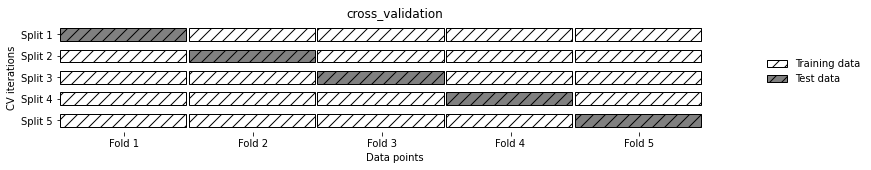

In [4]:
# !pip install mglearn
import mglearn
mglearn.plots.plot_cross_validation()

In [15]:
# cross_validate 함수 사용

from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습(3등분) 
scores = cross_validate(tree_model, X, y, cv=3, return_estimator=True)
scores

# fit_time : 훈련 시간  
# score_time : 테스트 시간  
# test_score : 훈련 점수  
# train_score : 테스트 점수

df = pd.DataFrame(scores, index = ['case1', 'case2', 'case3'])
df

,fit_time,score_time,estimator,test_score
case1,0.006243,0.006861,DecisionTreeClassifier(random_state=42),0.98
case2,0.004985,0.002995,DecisionTreeClassifier(random_state=42),0.94
case3,0.005755,0.004185,DecisionTreeClassifier(random_state=42),0.96


In [24]:
# 교차 검증 평균 정확도
df.iloc[:,3].mean()

0.96

In [26]:
# cross_val_score 함수 사용

from sklearn.model_selection import cross_val_score

cross_val_score(tree_model, iris.data, iris.target, cv=3)

array([0.98, 0.94, 0.96])

In [27]:
cross_val_score(tree_model, iris.data, iris.target, cv=3).mean()

0.96

두 함수의 결과가 같음을 알 수 있다.  
보통 위와 같은 점수들을 통틀어 교차 검증의 정확도를 간단하게 나타낼 때는 평균을 이용한다.

In [32]:
# 3개의 분류기의 예측 결과
for i in range(3):
    print(scores['estimator'][i].predict(data))

[0 1 2]
[0 2 2]
[0 2 2]


## 3. 하이퍼파라미터 최적화(GridSearchCV)

트리 모델에서 설정할 수 있는 여러 하이퍼 파라미터를 격자(grid) 형태로 만들어서 하나씩 수행, 이렇게 해서 어떤 조건의 트리 모델을 만들었을 때 가장 좋은 모델이 만들어지는지 확인하는 과정

- GridSearch: 하이퍼파라미터를 격자 형태로 여러 조건을 만들고 각각의 경우의 수를 조합하여 모델링시 필요한 하이퍼파라미터를 설정할 때 가장 최적의 파리미터값을 찾아주는 방법
- CV: cross validate
- GridSearch와 CV을 함께 진행하면서 성능이 좋은 모델을 찾는다.

In [12]:
from sklearn.model_selection import GridSearchCV

# parameter를 dictionary 형태로 설정
# mat_depth: 의사결정나무를 얼만큼 깊게 만들 것인지 설정
# min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터수 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]} # 6개 경우의 수

# param_grid: 하이퍼파라미터
# param_grid: 학습할 모델(트리 모델)을 만들때 설정해줄 수 있는 하이퍼파라미터들을 어떤 경우의 수를 찾아볼 것인지 지정하는 옵션
# cv: 3개의 train, test set fold 로 나누어 학습    
grid_trees = GridSearchCV(tree_model, param_grid=parameters, cv=3) # 6개 트리 모델 생성

# param_grid의 하이퍼파라미터들을 순차적으로 학습 + 평가
grid_trees.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [13]:
# cv_results_ 속성에 기록
# cv_results_ 은 GridSearchCV의 결과 세트로서 딕셔너리 형태를 갖는다.
grid_trees.cv_results_

# mean_fit_time: 각각의 모델을 만드는데 걸리는 시간
# mean_score_time: 각 모델의 순위 출력

{'mean_fit_time': array([0.00665029, 0.00599019, 0.0049878 , 0.00398946, 0.00332379,
        0.00332467]),
 'std_fit_time': array([0.0024885 , 0.00293559, 0.00141147, 0.00081517, 0.00046952,
        0.00047058]),
 'mean_score_time': array([0.00365512, 0.00531189, 0.00299176, 0.0026598 , 0.00232689,
        0.00199477]),
 'std_score_time': array([4.70472671e-04, 2.62031678e-03, 1.41034595e-03, 4.70359474e-04,
        4.70415035e-04, 2.24783192e-07]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'ma

In [14]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_trees.cv_results_)
scores_df

# 오히려 max_depth=3일 때가 2일 때보다 성능이 떨어진다.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006650,0.002489,0.003655,4.704727e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.657895,0.648649,0.675676,0.660740,0.011216,5
1,0.005990,0.002936,0.005312,2.620317e-03,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.657895,0.648649,0.675676,0.660740,0.011216,5
2,0.004988,0.001411,0.002992,1.410346e-03,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.947368,0.918919,0.945946,0.937411,0.013089,1
3,0.003989,0.000815,0.002660,4.703595e-04,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.947368,0.918919,0.945946,0.937411,0.013089,1
4,0.003324,0.000470,0.002327,4.704150e-04,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.921053,0.918919,0.945946,0.928639,0.012269,3
5,0.003325,0.000471,0.001995,2.247832e-07,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.921053,0.918919,0.945946,0.928639,0.012269,3


In [15]:
print('GridSearchCV 최적 파라미터:', grid_trees.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_trees.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9374


## 4. 다양한 분류모델

### KNN
- 새로운 데이터를 기존 클러스터 내의 모든 데이터와 거리를 측정하여 가장 많은 속성을 가진 클러스터에 할당하는 분류 알고리즘
- 주변의 제일 가까운 K개의 데이터 포인트를 찾아서, "다수결"로 값을 정하는 방식

[KNN 모델 학습 과정]
1. 군집 정보 구성: 데이터 셋 그룹핑
2. 거리 측정
3. 매개변수 선택(K값 선정): 몇 개로 그룹을 묶을 것인지 설정
4. 후보집합 생성: K개 안에 들어갈 수 있는 후보집합 생성
5. 클래스 매핑: 레이블 값 확인(새로운 데이터가 어느 클래스에 매핑되는지 확인)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

neighbor_model = KNeighborsClassifier(n_neighbors=5) # K값 지정
neighbor_model.fit(X_train, y_train)

KNeighborsClassifier()

### SVM(Support Vector Machine)
- 데이터를 분류하기 위해 **최적**의 선을 찾는 방식으로 분류기를 만드는 발상
- 최적의 선: 두 데이터의 가장 끝 값(support vector)에 각각 선(Positive/Negative hyperplane)을 긋고, 두 선의 간격이 가장 최대화가 되는 면적이 가장 넓어지는 두 선을 찾는다. 두 선의 중간이 바로 최적의 선(Optimal hyperplane)이다.

- 각각의 hyperplane이 최대가 되는 support vector를 찾고, 중간의 선(Optimal hyperplane)을 지정해서 이를 경계로 해서 분류한다.
- 주어진 많은 데이터들을 가능한 멀리 두 개의 집단으로 불리시키는(margin을 최대로 하는) 최적의 초평면을 찾는 분류모델 알고리즘
- 주어진 데이터 집합을 바탕으로 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만드는 분류 모델 알고리즘

In [17]:
from sklearn.svm import SVC # SV Classifier or SV Regressor

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

### RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# n_estimators: 나무를 몇 그루 심을 것인지 설정

RandomForestClassifier(random_state=42)

In [19]:
model_list = [tree_model, neighbor_model, svm_model, forest_model]

for model in model_list:
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(model_name, score))  

DecisionTreeClassifier 정확도: 0.8947
KNeighborsClassifier 정확도: 0.9737
SVC 정확도: 0.9211
RandomForestClassifier 정확도: 0.9211


## 5. 앙상블
- 여러 분류 모형에 대한 결과를 종합하여 한 데이터로 분류하는 모형
- 분류 모형은 데이터를 변화해서 생성할 수 있고, 다른 메커니즘의 분류기를 여러 개 사용하는 것도 가능
- 결과의 종합은 다수결이나 기타 방법을 이용
- 한 모형으로 데이터를 분류할 때보다 오분류 감소
- 유형: 배깅, 부스팅

[배깅]
- 개별로 모델을 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습시키고, 각각 예측을 수행한 결과를 보팅를 통해 최종 예측 결과를 추출하는 방식
- 부트스트래핑: 데이터를 랜덤 샐플링하여 추출하는 방식, 한 표본에 같은 데이터가 여러 번 추출될 수 있고, 어떤 데이터는 추출되지 않을 수 있음
- 분류 모델의 최종 예측 결과: 최빈값, 가장 많은 예측 클래스
- 회귀 모델의 최종 예측 결과: 각 분류기의 예측값의 평균값

(보팅)
- 하드 보팅: 다수의 분류기 간 다수결로 최종 class 결정 
- 소프트 보팅: 다수의 분류기 간의 최종 class 확률을 평균하여 결정
- 일반적으로 하드 보팅보다 소프트 보팅 성능이 더 좋은

[부스팅]
- 모델에서 오분류한 학습 데이터를 다음 모델이 빌드될 때 학습 튜플로 선택되어질 가능성을 높여줘서 다음 모델에서 오류를 보완하는 기법
- 성능이 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 기법
- 부스팅 방법의 아이디어는 앞에서 학습된 모델을 보완해 나가면서 더 나은 모델로 학습시키는 것
- 종류: 그래디언트부스트, XGBoost, LightGBM

[그래디언트 부스팅]
- 오류 데이터에 가중치를 부여할 때 가중치 업데이터를 경사하강겁을 이용
- 경사하강법: 예측값과 실제값의 차이를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 방법

[XGBoost]
- 그래디언트 부스팅 알고리즘을 분산환경에서 실행할 수 있도록 구현한 라이브러리

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

gbm_model = GradientBoostingClassifier(random_state=10)
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
lgb_model = LGBMClassifier(n_estimators=300)
# XGBoost와 LightGBM는 의사결정나무 기반 모델이므로 n_estimators을 설정한다.

model_list = [tree_model, neighbor_model, svm_model, forest_model, gbm_model, xgb_model, lgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(model_name, score)) 

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# RF분류기와 KNN 분류기로 나온 예측값을 소프트 보팅을 이용해서 결과 출력

from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[('RF',forest_model),\
                                            ('KNN',neighbor_model)] , voting='soft' )
voting_model.fit(X_train , y_train)
score = voting_model.score(X_test, y_test)
print('VotingClassifier 정확도: {0:.4f}'.format(score))

## 6. 조기종료(early stop)

In [ ]:
from lightgbm import LGBMClassifier

lgb_model2 = LGBMClassifier(n_estimators=300)
evals = [(X_test, y_test)]
lgb_model2.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)
score = lgb_model2.score(X_test, y_test)
print('LGBMClassifier EarlyStopping 정확도: {0:.4f}'.format(score))